<a href="https://colab.research.google.com/github/mario-rot/ComputerVisionCourse-MAI/blob/main/Session%206/P6_Mario_Lauren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.9 MB/s 
     |████████████████████████████████| 965 kB 38.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


# Laboratory #3_1 : Face detection and recognition

At the end of this laboratory, you would get familiarized with

*   Face detection
    *   Integral images
    *   Haar-like feature computation
    *   Adaboost 
*   Face recognition
    *   Eigen Faces
    *   PCA

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [2]:
%%shell
git clone https://github.com/mario-rot/ComputerVisionCourse-MAI.git
cd 'ComputerVisionCourse-MAI'
mv 'Session 6/images' /content/
mv 'customplots.py' /content/
mv 'utils.py' /content/

Cloning into 'ComputerVisionCourse-MAI'...
remote: Enumerating objects: 11873, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 11873 (delta 112), reused 244 (delta 85), pack-reused 11579
Receiving objects: 100% (11873/11873), 86.63 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (115/115), done.
Checking out files: 100% (11667/11667), done.


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import numpy as np
from skimage import data, io, transform
import os
import matplotlib
from PIL import Image
from multiprocessing import Pool
from functools import partial
import time
import timeit
from matplotlib import pyplot as plt
from customplots import custom_grids
import pandas as pd

path = '/content/images/'

# Face Detection using AdaBoost

### Exercise #1

*   Build a function compute_integral_image that computes the integral image of an input (2D) array. In an integral image each pixel is the sum of all pixels in the original image that are 'left and above' the pixel. See the following example:

```
Original    Integral
+--------   +------------
| 1 2 3 .   | 0  0  0  0 .
| 4 5 6 .   | 0  1  3  6 .
| . . . .   | 0  5 12 21 .
            | . . . . . .
```

*   The integral image must have an additional row and column full of zeros (first row and first column).
*   Plot the output of the integral image for the following array:

```
img_array = np.array([[1,2,2,2,1],[1,2,2,2,1],[1,2,2,2,1],[1,2,2,2,1]])
```

In [2]:
def compute_integral_image(img_arr):
    """
    Calculates the integral image based on the original image data.
    :param img_arr: Image source data
    :type img_arr: numpy.ndarray
    :return Integral image for given image
    :rtype: numpy.ndarray
    """
    # an index of -1 refers to the last row/column
    # since row_sum is calculated starting from (0,0),
    # rowSum(x, -1) == 0 holds for all x
    row_sum = np.zeros(img_arr.shape)
    # we need an additional column and row
    integral_image_arr = np.zeros((img_arr.shape[0] + 1, img_arr.shape[1] + 1))

    
    # Add code here
    ii = np.array(transform.integral_image(img_arr))
    for r in range(len(ii)):
      for c in range(len(ii[0])):
        integral_image_arr[r+1][c+1] = ii[r][c]


    return integral_image_arr

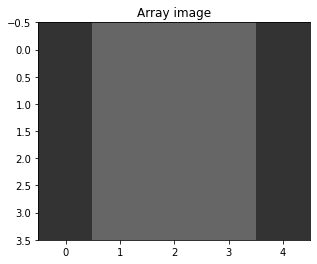

In [3]:
img_array = np.array([[1, 2, 2, 2, 1], [1, 2, 2, 2, 1], [1, 2, 2, 2, 1], [1, 2, 2, 2, 1]])
plt.imshow(img_array, cmap="gray", vmin=0, vmax= 5)
plt.title("Array image")
plt.show()

In [4]:
ii_img_array = compute_integral_image(img_array)
print(ii_img_array)

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  5.  7.  8.]
 [ 0.  2.  6. 10. 14. 16.]
 [ 0.  3.  9. 15. 21. 24.]
 [ 0.  4. 12. 20. 28. 32.]]


*   Test the function using 'camera' image from the data module. Plot the original image and the integral image.

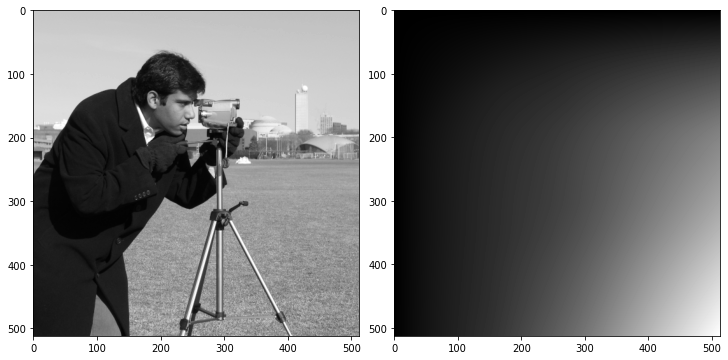

In [5]:
# solution
# solution
camera = data.camera()

camera_ii = compute_integral_image(camera)

custom_grids([camera, camera_ii], 1, 2, cmap='gray').show()


### Exercise #2

*   Create a function sum_region to compute the sum of the pixel intensities within a rectangle using the integral image. The rectangle will be defined using the top left (x, y) and bottom right (x, y) coordinates.

In [6]:
def sum_region(integral_img_arr, top_left, bottom_right):

    
    # Add code here
    sum = integral_img_arr[bottom_right[0]][bottom_right[1]]
    sum -= integral_img_arr[top_left[0]][bottom_right[1]]
    sum -= integral_img_arr[bottom_right[0]][top_left[1]]
    sum += integral_img_arr[top_left[0]][top_left[1]]
    
    
    return sum

*   Make the following tests:

In [7]:
# result you should get (12)
print(sum_region(ii_img_array, [1, 1], [3, 4]))

12.0


In [8]:
# result you should get (32)
print(sum_region(ii_img_array, [0, 0], [-1, -1]))

32.0


### Exercise #3

*   Build a function load_integral_images to read all the images inside a given folder and compute the integral image of every image

In [9]:
def load_integral_images(path):
    ii_images = []
    original_images = []
    for _file in os.listdir(path):
        #### Complete here:
        #### Read image
        #### Remember to scale the images (with the max pixel intensity value)
        if _file[-4:] == '.png': 
        
          curr_file = plt.imread(path +'/'+ _file)
          original_images.append(curr_file)
          ii_img = compute_integral_image(curr_file)
          max_pixel = ii_img.max()
          ii_img = ii_img / max_pixel
          ii_images.append(ii_img) 

    return original_images, ii_images


# With this function we are reading each file in the folder, calculating its integral image and after that normalizing the image.
# Finally we put our processed image in the list that we will return

*   Use the load_integral_images function to compute the integral images of training and testing data

In [10]:
# change paths to your location

root_dir = path

pos_training_path = os.path.join(root_dir, 'train_data/faces')
neg_training_path = os.path.join(root_dir, 'train_data/non_faces')
pos_testing_path = os.path.join(root_dir, 'test_data/faces')
neg_testing_path = os.path.join(root_dir, 'test_data/non_faces')

In [11]:
# solution
pos_training_orig, pos_training_ii = load_integral_images(pos_training_path)
neg_training_orig, neg_training_ii = load_integral_images(neg_training_path)
pos_testing_orig, pos_testing_ii = load_integral_images(pos_testing_path)
neg_testing_orig, neg_testing_ii = load_integral_images(neg_testing_path)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


*   Visualize a few original images and the corresponding integral images using matplotlib.

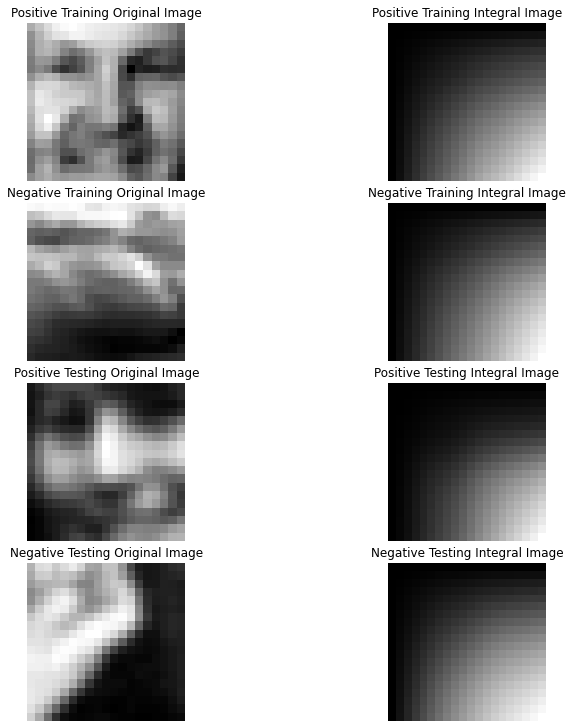

In [12]:
# solution


imgs = [pos_training_orig[0], pos_training_ii[0], neg_training_orig[0], neg_training_ii[0],
        pos_testing_orig[0], pos_testing_ii[0], neg_testing_orig[0], neg_testing_ii[0]]

titles = ['Positive Training Original Image', 'Positive Training Integral Image', 
          'Negative Training Original Image', 'Negative Training Integral Image',
          'Positive Testing Original Image', 'Positive Testing Integral Image',
          'Negative Testing Original Image', 'Negative Testing Integral Image']

custom_grids(imgs, 4, 2, cmap='gray', axis='off', titles=titles).show()


### Exercise #4

*   Compute the Haar features of an image.
*   We provide you with HaarLikeFeature class that has build in a get_score function and a get_vote function. Your job is to complete the code of the method _create_features in the class HaarLikeFeature:

In [13]:
def enum(**enums):
    return type('Enum', (), enums)

FeatureType = enum(TWO_VERTICAL=(1, 2), TWO_HORIZONTAL=(2, 1), THREE_HORIZONTAL=(3, 1), THREE_VERTICAL=(1, 3), FOUR=(2, 2))
FeatureTypes = [FeatureType.TWO_VERTICAL, FeatureType.TWO_HORIZONTAL, FeatureType.THREE_VERTICAL, FeatureType.THREE_HORIZONTAL, FeatureType.FOUR]

In [14]:
class HaarLikeFeature(object):
    """
    Class representing a haar-like feature.
    """

    def __init__(self, feature_type, position, width, height, threshold, polarity):
        """
        Creates a new haar-like feature.
        :param feature_type: Type of new feature, see FeatureType enum
        :type feature_type: HaarLikeFeature.FeatureTypes
        :param position: Top left corner where the feature begins (x, y)
        :type position: (int, int)
        :param width: Width of the feature
        :type width: int
        :param height: Height of the feature
        :type height: int
        :param threshold: Feature threshold
        :type threshold: float
        :param polarity: polarity of the feature -1 or 1
        :type polarity: int
        """
        self.type = feature_type
        self.top_left = position
        self.bottom_right = (position[0] + width, position[1] + height)
        self.width = width
        self.height = height
        self.threshold = threshold
        self.polarity = polarity
        self.weight = 1
    
    def get_score(self, int_img):
        """
        Get score for given integral image array.
        :param int_img: Integral image array
        :type int_img: numpy.ndarray
        
        :return: Score for given feature
        :rtype: float
        """
        score = 0
        if self.type == FeatureType.TWO_VERTICAL:
            first = sum_region(int_img, self.top_left, (self.top_left[0] + self.width, int(self.top_left[1] + self.height / 2)))
            second = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + self.height / 2)), self.bottom_right)
            score = first - second
        elif self.type == FeatureType.TWO_HORIZONTAL:
            first = sum_region(int_img, self.top_left, (int(self.top_left[0] + self.width / 2), self.top_left[1] + self.height))
            second = sum_region(int_img, (int(self.top_left[0] + self.width / 2), self.top_left[1]), self.bottom_right)
            score = first - second
        elif self.type == FeatureType.THREE_HORIZONTAL:
            first = sum_region(int_img, self.top_left, (int(self.top_left[0] + self.width / 3), self.top_left[1] + self.height))
            second = sum_region(int_img, (int(self.top_left[0] + self.width / 3), self.top_left[1]), (int(self.top_left[0] + 2 * self.width / 3), self.top_left[1] + self.height))
            third = sum_region(int_img, (int(self.top_left[0] + 2 * self.width / 3), self.top_left[1]), self.bottom_right)
            score = first - second + third
        elif self.type == FeatureType.THREE_VERTICAL:
            first = sum_region(int_img, self.top_left, (self.bottom_right[0], int(self.top_left[1] + self.height / 3)))
            second = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + self.height / 3)), (self.bottom_right[0], int(self.top_left[1] + 2 * self.height / 3)))
            third = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + 2 * self.height / 3)), self.bottom_right)
            score = first - second + third
        elif self.type == FeatureType.FOUR:
            # top left area
            first = sum_region(int_img, self.top_left, (int(self.top_left[0] + self.width / 2), int(self.top_left[1] + self.height / 2)))
            # top right area
            second = sum_region(int_img, (int(self.top_left[0] + self.width / 2), self.top_left[1]), (self.bottom_right[0], int(self.top_left[1] + self.height / 2)))
            # bottom left area
            third = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + self.height / 2)), (int(self.top_left[0] + self.width / 2), self.bottom_right[1]))
            # bottom right area
            fourth = sum_region(int_img, (int(self.top_left[0] + self.width / 2), int(self.top_left[1] + self.height / 2)), self.bottom_right)
            score = first - second - third + fourth
        return score
    
    def get_vote(self, int_img):
        """
        Get vote of this feature for given integral image.
        :param int_img: Integral image array
        :type int_img: numpy.ndarray
        
        :return: 1 iff this feature votes positively, otherwise -1
        :rtype: int
        """
        score = self.get_score(int_img)
        return self.weight * (1 if score < self.polarity * self.threshold else -1)

In [15]:
def learn(positive_iis, negative_iis, num_classifiers=-1, min_feature_width=1, max_feature_width=-1, min_feature_height=1, max_feature_height=-1):
    """
    Selects a set of classifiers. Iteratively takes the best classifiers based
    on a weighted error.
    :param positive_iis: List of positive integral image examples
    :type positive_iis: list[numpy.ndarray]
    :param negative_iis: List of negative integral image examples
    :type negative_iis: list[numpy.ndarray]
    :param num_classifiers: Number of classifiers to select, -1 will use all
    classifiers
    :type num_classifiers: int
    
    :return: List of selected features
    :rtype: list[HaarLikeFeature.HaarLikeFeature]
    """
    num_pos = len(positive_iis)
    num_neg = len(negative_iis)
    num_imgs = num_pos + num_neg
    img_height, img_width = positive_iis[0].shape

    # Maximum feature width and height default to image width and height
    max_feature_height = img_height if max_feature_height == -1 else max_feature_height
    max_feature_width = img_width if max_feature_width == -1 else max_feature_width

    # Create initial weights and labels
    pos_weights = np.ones(num_pos) * 1. / (2 * num_pos)
    neg_weights = np.ones(num_neg) * 1. / (2 * num_neg)
    weights = np.hstack((pos_weights, neg_weights))
    labels = np.hstack((np.ones(num_pos), np.ones(num_neg) * -1)) 

    images = positive_iis + negative_iis

    # Create features for all sizes and locations
    features = _create_features(img_height, img_width, min_feature_width, max_feature_width, min_feature_height, max_feature_height)
    num_features = len(features)
    feature_indexes = list(range(num_features))

    num_classifiers = num_features if num_classifiers == -1 else num_classifiers

    print('Calculating scores for images..')
    t0 = time.time()
    votes = np.zeros((num_imgs, num_features))
    # Use as many workers as there are CPUs
    pool = Pool(processes=8)
    for i in range(num_imgs):
        votes[i, :] = np.array(list(pool.map(partial(_get_feature_vote, image=images[i]), features)))

    
    print('\tTime needed for calculating scores:', time.time()-t0)
    
    # select classifiers
    classifiers = []

    t0 = time.time()
    print('Selecting classifiers..')
    for _ in range(num_classifiers):

        classification_errors = np.zeros(len(feature_indexes))

        # normalize weights
        weights *= 1. / np.sum(weights)

        # select best classifier based on the weighted error
        for f in range(len(feature_indexes)):
            f_idx = feature_indexes[f]
            # classifier error is the sum of image weights where the classifier
            # is right
            error = sum(map(lambda img_idx: weights[img_idx] if labels[img_idx] != votes[img_idx, f_idx] else 0, range(num_imgs)))
            classification_errors[f] = error

        # get best feature, i.e. with smallest error
        min_error_idx = np.argmin(classification_errors)
        best_error = classification_errors[min_error_idx]
        best_feature_idx = feature_indexes[min_error_idx]

        # set feature weight
        best_feature = features[best_feature_idx]
        feature_weight = 0.5 * np.log((1 - best_error) / best_error)
        best_feature.weight = feature_weight

        classifiers.append(best_feature)

        # update image weights
        weights = np.array(list(map(lambda img_idx: weights[img_idx] * np.sqrt((1-best_error)/best_error) if labels[img_idx] != votes[img_idx, best_feature_idx] else weights[img_idx] * np.sqrt(best_error/(1-best_error)), range(num_imgs))))

        # remove feature (a feature can't be selected twice)
        feature_indexes.remove(best_feature_idx)

    print('\tTime needed for Selecting Classifiers:', time.time()-t0,'\n')

    return classifiers


def _get_feature_vote(feature, image):
    return feature.get_vote(image)


def _create_features(img_height, img_width, min_feature_width, max_feature_width, min_feature_height, max_feature_height):
    print('Creating Haar-like features..')
    t0 = time.time()
    features = []
    for feature in FeatureTypes:
        # FeatureTypes are just tuples
        feature_start_width = max(min_feature_width, feature[0])
        for feature_width in range(feature_start_width, max_feature_width, feature[0]):
            feature_start_height = max(min_feature_height, feature[1])
            for feature_height in range(feature_start_height, max_feature_height, feature[1]):
              # Loop over possible x values and y values 
              # - For each (x,y) create the HarrLikeFeature objects.
              # - append the HaarlikeFeatures in the features list.
              for x in range(img_width - feature_width):
                  for y in range(img_height - feature_height):
                      features.append(HaarLikeFeature(feature, (x, y), feature_width, feature_height, 0, 1))
                      features.append(HaarLikeFeature(feature, (x, y), feature_width, feature_height, 0, -1))
            
    print('\t' + str(len(features)) + ' features created.')
    print('\tTime needed for calculating Haar-like features:', time.time()-t0)
    return features

### Exercise #5

*   Use the learn method to learn a list of two classifiers with the train data. With the learn function you can build a list of classifiers that detect whether an image contains a face or not.

*   Use the following hyperparameters of the features and num_classifiers

In [16]:
num_classifiers = 2
min_feature_height = 8
max_feature_height = 10
min_feature_width = 8
max_feature_width = 10

In [17]:
# solution

# %%time
classifiers = learn(pos_training_ii, neg_training_ii, num_classifiers, min_feature_width, max_feature_width, min_feature_height, max_feature_height)

Creating Haar-like features..
	2496 features created.
	Time needed for calculating Haar-like features: 0.006411314010620117
Calculating scores for images..
	Time needed for calculating scores: 380.4733211994171
Selecting classifiers..
	Time needed for Selecting Classifiers: 38.38463521003723 



### Exercise #6

*   Make a function for voting with different classifiers
*   Build two functions ensemble_vote and ensemble_vote_all.
*   **ensemble_vote(int_img, classifiers)** has to return a 1 if the majority of the votes of the classifiers is positive and a zero otherwise
*   **ensemble_vote_all(int_imgs, classifiers)** has to loop over the list int_imgs and compute the ensemble_vote for each image in the list. It has to return a list containing all the votes for all the images in int_imgs.


In [18]:
# solution
def ensemble_vote(int_img, classifiers):
  if np.array([c.get_vote(int_img) for c in classifiers]).sum() >= 0:
    return 1
  else:
    return 0

def ensemble_vote_all(int_imgs, classifiers):
  vote_list = []
  for img in int_imgs:
    vote_list.append(ensemble_vote(img, classifiers))
  return vote_list



*   Use the functions to compute the train and test acurracies for faces and non faces.
*   Print the results in the following format:

```
train results:
Correctly identified Faces: 2129/2429  (87.64923836969946%)
Correctly identified non-Faces: 4276/8548  (50.02339728591484%)

test results:
Correctly identified Faces: 300/472  (63.559322033898304%)
Correctly identified non-Faces: 74/128  (57.8125%)
```

*   It is not required to get this exact results but print the information in this format. It facilitates understanding the results.

In [19]:
# solution
print('train results:')
positive_training = ensemble_vote_all(pos_training_ii, classifiers)
print('Correctly identified Faces: {}/{}  ({}%)'.format(positive_training.count(1), len(positive_training), (positive_training.count(1)/len(positive_training)*100)))
negative_training = ensemble_vote_all(neg_training_ii, classifiers)
print('Correctly identified non-faces: {}/{}  ({}%)'.format(negative_training.count(0), len(negative_training), (negative_training.count(0)/len(negative_training)*100)))
print('')
print('test results:')
positive_testing = ensemble_vote_all(pos_testing_ii, classifiers)
print('Correctly identified Faces: {}/{}  ({}%)'.format(positive_testing.count(1), len(positive_testing), (positive_testing.count(1)/len(positive_testing)*100)))
negative_testing = ensemble_vote_all(neg_testing_ii, classifiers)
print('Correctly identified non-faces: {}/{}  ({}%)'.format(negative_testing.count(0), len(negative_testing), (negative_testing.count(0)/len(negative_testing)*100)))

train results:
Correctly identified Faces: 2129/2429  (87.64923836969946%)
Correctly identified non-faces: 4275/8555  (49.9707773232028%)

test results:
Correctly identified Faces: 299/472  (63.347457627118644%)
Correctly identified non-faces: 75/128  (58.59375%)


### Exercise #7

*   Make another test with 20 classifiers instead of 2.
*   Inspect the classification results if you use adaboost with 20 classifiers. *   Use the same hyperameters for the features. Print the results as in the previous exercise.

In [20]:
num_classifiers = 20
min_feature_height = 8
max_feature_height = 10
min_feature_width = 8
max_feature_width = 10

In [21]:
# solution

%%time 

classifiers_20 = learn(pos_training_ii, neg_training_ii, num_classifiers, min_feature_width, max_feature_width, min_feature_height, max_feature_height)

Creating Haar-like features..
	2496 features created.
	Time needed for calculating Haar-like features: 0.004435062408447266
Calculating scores for images..
	Time needed for calculating scores: 346.2456681728363
Selecting classifiers..
	Time needed for Selecting Classifiers: 431.7496027946472 

CPU times: user 8min 57s, sys: 10.8 s, total: 9min 7s
Wall time: 12min 58s


In [22]:
# solution
print('train results:')
positive_training = ensemble_vote_all(pos_training_ii, classifiers_20)
print('Correctly identified Faces: {}/{}  ({}%)'.format(positive_training.count(1), len(positive_training), (positive_training.count(1)/len(positive_training)*100)))
negative_training = ensemble_vote_all(neg_training_ii, classifiers_20)
print('Correctly identified non-faces: {}/{}  ({}%)'.format(negative_training.count(0), len(negative_training), (negative_training.count(0)/len(negative_training)*100)))
print('')
print('test results:')
positive_testing = ensemble_vote_all(pos_testing_ii, classifiers_20)
print('Correctly identified Faces: {}/{}  ({}%)'.format(positive_testing.count(1), len(positive_testing), (positive_testing.count(1)/len(positive_testing)*100)))
negative_testing = ensemble_vote_all(neg_testing_ii, classifiers_20)
print('Correctly identified non-faces: {}/{}  ({}%)'.format(negative_testing.count(0), len(negative_testing), (negative_testing.count(0)/len(negative_testing)*100)))


train results:
Correctly identified Faces: 2224/2429  (91.56031288596131%)
Correctly identified non-faces: 7115/8555  (83.1677381648159%)

test results:
Correctly identified Faces: 246/472  (52.118644067796616%)
Correctly identified non-faces: 103/128  (80.46875%)


*   Discuss if the classification results improved in the train data.


**Solution**

*When 20 classifiers were used, the classification results improved in correctly identifying faces in the train data, however, the results were significantly worse when correctly identifying non-faces. This is likely because, as the number of classifiers increases, each one is attempting to improve on the mistakes of the previous classifier. The reason there would be a lower value for correctly identifying non-faces could be that each classifier's main goal is to find true positives, not true negatives, so each successive classifier is neglecting performance improvements in identifying true negatives in favor of improving performance in identifying true positives.*

...

### Exercise #8

*   Change the voting functions so that you can set a threshold for deciding a prediction.
*   The threshold value indicates the minimum score for assigning a "positive" label (detect a face).
*   Create the following functions
    *   ensemble_vote_t: returns the final decision of a list of classifiers for a given threshold.
    *   ensemble_vote_all_t: Iterates over a list of integral images and returns the final decision of a list of classifiers for each of the images (for a given threshold).

In [23]:
# solution
def ensemble_vote_t(int_img, classifiers, threshold):
  if np.array([c.get_vote(int_img) for c in classifiers]).sum() >= threshold:    
    return 1
  else:
    return 0

def ensemble_vote_all_t(int_imgs, classifiers, threshold):
  vote_list = []
  for img in int_imgs:
    vote_list.append(ensemble_vote_t(img, classifiers, threshold))
  return vote_list

*   Using the list of 20 classifiers compute the following:

    1.   number of correct faces over all faces (in the train data)
    2.   number of correct non faces over all non faces (in the train data)
    3.   number of correct faces over all faces (in the test data)
    4.   number of correct non faces over all non faces (in the test data)

*   The quantities have to be computed for each of the following thresholds:
```
thresholds = np.array([x for x in range(-5,5,1)])/10.
```

In [45]:
# solution
thresholds = np.array([x for x in range(-5,5,1)])/10.
ptr,ntr,pts,nts = [],[],[],[]
for threshold in thresholds:
  print('######################## Threshold = {} ########################'.format(threshold))
  print('train results:')
  positive_training = ensemble_vote_all_t(pos_training_ii, classifiers_20, threshold)
  ptr.append((positive_training.count(1)/len(positive_training)*100))
  print('Correctly identified Faces: {}/{}  ({}%)'.format(positive_training.count(1), len(positive_training), (positive_training.count(1)/len(positive_training)*100)))
  negative_training = ensemble_vote_all_t(neg_training_ii, classifiers_20, threshold)
  ntr.append((negative_training.count(0)/len(negative_training)*100))
  print('Correctly identified non-faces: {}/{}  ({}%)'.format(negative_training.count(0), len(negative_training), (negative_training.count(0)/len(negative_training)*100)))
  print('')
  print('test results:')
  positive_testing = ensemble_vote_all_t(pos_testing_ii, classifiers_20, threshold)
  pts.append((positive_testing.count(1)/len(positive_testing)*100))
  print('Correctly identified Faces: {}/{}  ({}%)'.format(positive_testing.count(1), len(positive_testing), (positive_testing.count(1)/len(positive_testing)*100)))
  negative_testing = ensemble_vote_all_t(neg_testing_ii, classifiers_20, threshold)
  nts.append((negative_testing.count(0)/len(negative_testing)*100))
  print('Correctly identified non-faces: {}/{}  ({}%)'.format(negative_testing.count(0), len(negative_testing), (negative_testing.count(0)/len(negative_testing)*100)))
  print('')

######################## Threshold = -0.5 ########################
train results:
Correctly identified Faces: 2370/2429  (97.57101687937423%)
Correctly identified non-faces: 5882/8555  (68.7551139684395%)

test results:
Correctly identified Faces: 346/472  (73.30508474576271%)
Correctly identified non-faces: 84/128  (65.625%)

######################## Threshold = -0.4 ########################
train results:
Correctly identified Faces: 2344/2429  (96.50061753808151%)
Correctly identified non-faces: 6207/8555  (72.55406195207482%)

test results:
Correctly identified Faces: 325/472  (68.85593220338984%)
Correctly identified non-faces: 89/128  (69.53125%)

######################## Threshold = -0.3 ########################
train results:
Correctly identified Faces: 2319/2429  (95.47138740222314%)
Correctly identified non-faces: 6437/8555  (75.24254821741671%)

test results:
Correctly identified Faces: 311/472  (65.88983050847457%)
Correctly identified non-faces: 94/128  (73.4375%)

########

*   Make a bar plot for 1-4. In the x axis write the threshold value.

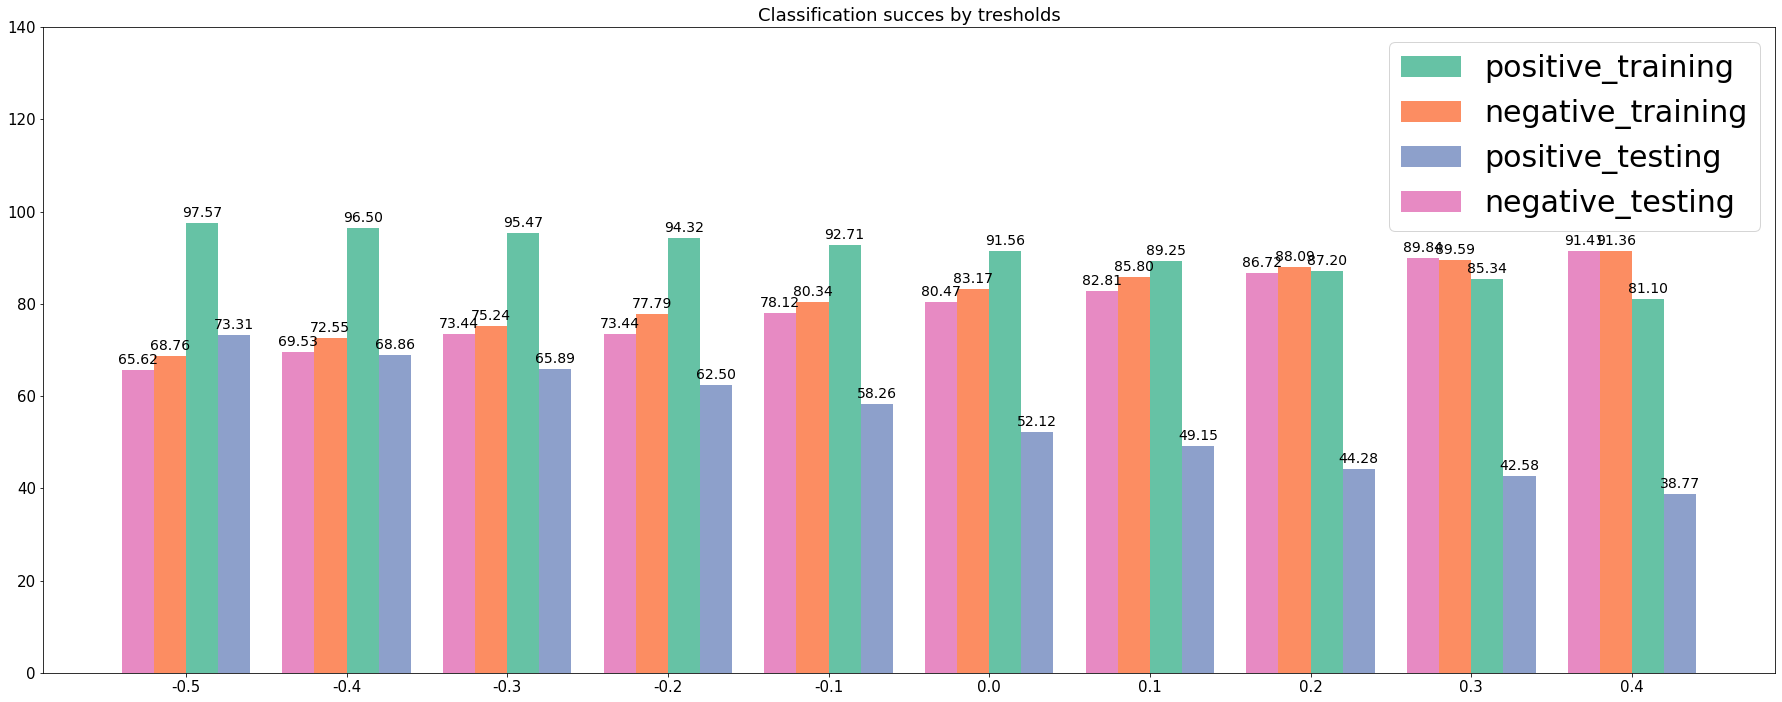

In [46]:
from customplots import groupedBarPlot
# solution
data = {'positive_training':ptr,
        'negative_training':ntr,
        'positive_testing':pts,
        'negative_testing':nts}
xtic=thresholds
title = 'Classification succes by tresholds'
groupedBarPlot(data, xtic, title, colors=plt.cm.Set2.colors, width = 0.2, axisLim = {'ylim': [0,140]})

*   Discuss what happens when you increase the threshold value.

**Solution**

*As the threshold value increases, the success for correct face classification decreases, as the number of positive votes needed to establish the final classification decision increases. However, this relaxes the necessary threshold of the number of votes needed to determine a non-face, which increases the performance on that task as the threshold increases.*

...

# Face Recognition using PCA


In [26]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

*   Loading the dataset

In [27]:
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


*   Creating training and testing set

In [48]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)
print('Number of classes in Train set:', np.unique(y_train).shape[0])

Train data shape: (966, 1850)
Test data shape: (322, 1850)
Number of classes in Train set: 7


### Exercise #1: PCA Computation
*   Compute a PCA (eigenfaces) on the face dataset
    *   *Set* number of components to 100

In [29]:
# solution
pca = PCA(100)
transformed_data = pca.fit_transform(X_train)

*   Reshape the components output of pca to obtain the eigen faces

In [30]:
# solution
eigenfaces = pca.components_
eigenfaces = eigenfaces.reshape(100, h,w)

*   Project the training and testing faces data on the orthonormal basis

In [31]:
# solution
print('X_train: \n')
X_train = pca.transform(X_train)
print(X_train)
print('\nX_test: \n')
X_test = pca.transform(X_test)
print(X_test)

X_train: 

[[-1469.7533     -654.5961      911.34485   ...   -44.169075
     26.673029     74.17189  ]
 [  935.4901      371.07684     228.87251   ...    37.292732
     16.418833     42.570103 ]
 [ -539.00696     -12.34964    -102.79525   ...    28.07715
      4.8956504   -11.045757 ]
 ...
 [ -538.38477      25.199768    -91.03095   ...    34.80529
     12.229824    -39.132183 ]
 [ -189.36313     524.9346      -95.20679   ...   102.99112
     21.496655    -49.283424 ]
 [ -934.3945     -705.2383       66.91568   ...   -43.096375
     68.51772      85.40646  ]]

X_test: 

[[ -973.8041    -1155.2427     -396.4587    ...    11.354465
     42.684387    -27.125622 ]
 [ -579.80054     950.9745     -292.5681    ...    12.707005
    -40.283188     73.67433  ]
 [ -615.94385    -183.36426    -526.1395    ...   -96.70348
     26.158482     -1.9458227]
 ...
 [  108.86748    -449.28525     359.41153   ...   -67.13668
     23.613518    -45.852802 ]
 [   40.368484    302.84424     -65.67663   ...    4

In [32]:
X_train.shape

(966, 100)

*   Plot the most significative eigenfaces (Show the top 12 eigenfaces) as a matplotlib

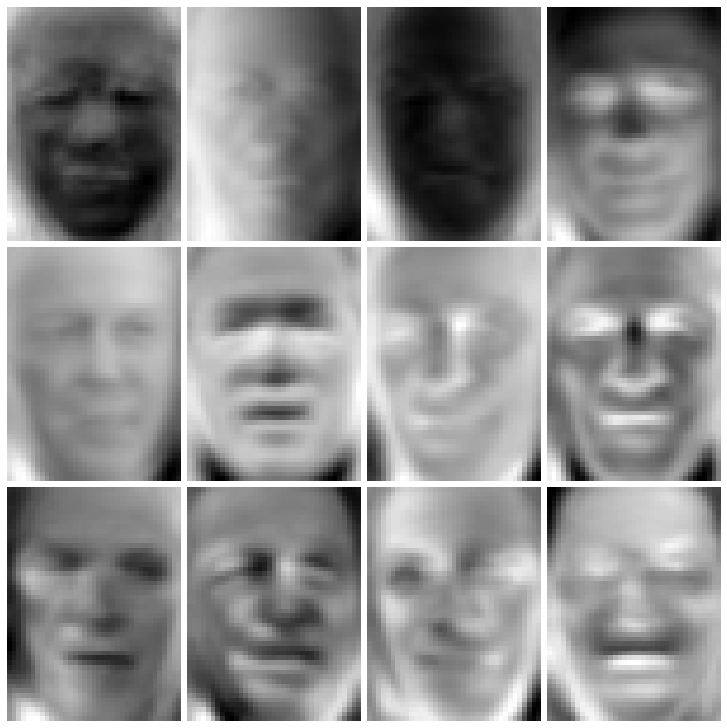

In [33]:
# solution
custom_grids(eigenfaces[:12], 3, 4, axis='off', cmap='gray').show()

*   Show the total percentage of variance explained by the selected components of the PCA.


Text(0, 0.5, 'Variance (%)')

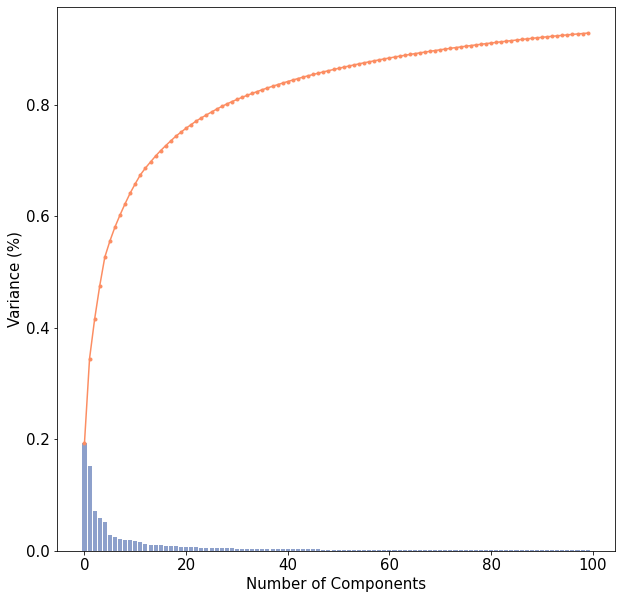

In [34]:
# solution
colors = plt.cm.Set2.colors

fig = plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.', color=colors[1])
plt.bar(list(range(0, pca.n_components_)), pca.explained_variance_ratio_, color=colors[2])
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')

*   What are the shortcomings of PCA?

**Solution**

*One shortcoming is that when the number of components is decreased, the total explained variance decreases, meaning that information is lost. Therefore, there needs to be compromise betweeen the extent of the dimensionality reduction and the amount of information willing to be sacrificed.*

*Another shortcoming is that PCA assumes that the principal components are correlated. If they are not coordinated in reality, this will result in poorer performance.*



...

### Exercise #2: k-NN Classification

*   Train a k-nearest neighbor model with the eigenfaces using the default parameters

In [35]:
# solution
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

*   Predict the test data using the trained classifier

In [36]:
# Quantitative evaluation of the model quality on the test set
pred = knn.predict(X_test)

### Exercise #3: Quantitative results

*   Compute accuracy, classification report and confusion matrix of the trained classifier

In [37]:
# solution
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, pred))

0.5745341614906833


In [38]:
# solution

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31        13
           1       0.53      0.60      0.56        60
           2       0.39      0.41      0.40        27
           3       0.66      0.78      0.71       146
           4       0.45      0.20      0.28        25
           5       0.46      0.40      0.43        15
           6       0.56      0.25      0.35        36

    accuracy                           0.57       322
   macro avg       0.48      0.42      0.43       322
weighted avg       0.56      0.57      0.56       322



In [39]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

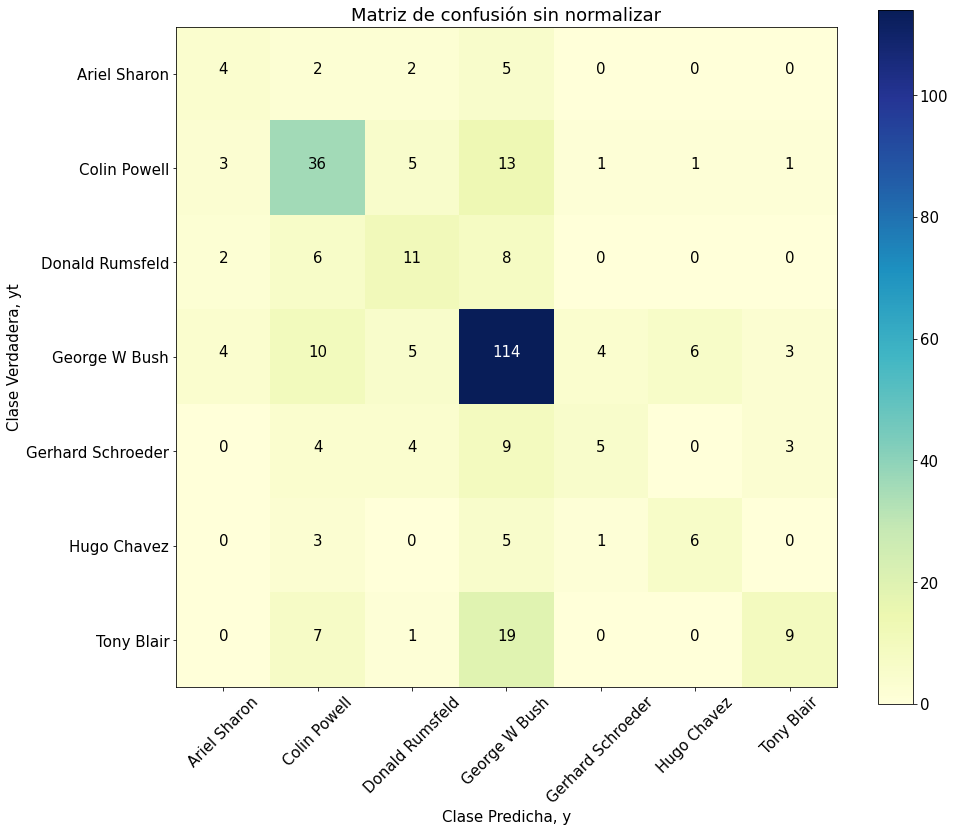

In [40]:
# solution
from customplots import plot_confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, pred),target_names, colors='YlGnBu', normalize=False)

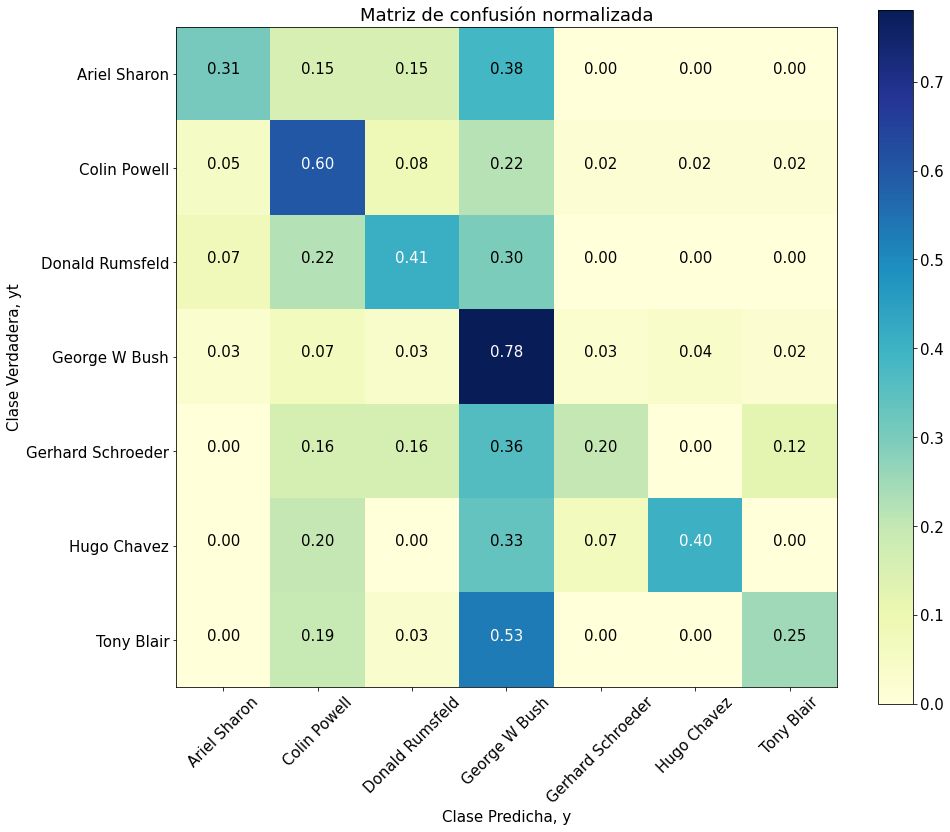

In [41]:
plot_confusion_matrix(confusion_matrix(y_test, pred),target_names, colors='YlGnBu', normalize=True)

*   Explain the measures showed in the classification report.
*   Discuss the obtained classification results, both the quantitative as well as the qualitative results.

**Solution**

*The **accuracy** determines the total number of correctly identified results over all results.*

*The **precision** value is the number of correctly identified positive results (true positives) over the total number of predictions that were positive (true positives and false positives). In other words, it shows what portion of the positive predictions were actually positive.*

*The **recall** value shows the portion of the actual positive values that were correctly predicted as positive.*

*The **f1-score** balances the precision and recall values to account for situations in which the distribution of the data may cause biases.*

*The **support** value shows the number of instances that occur in each class, according to the original data.*

*The **macro average** gives an average value for each the precision, the recall, and the f1-score.*

*The **weighted average** averages each score (ie precision, recall, f1), while weighting each individual value in the calculation according to the corresponding support value for that class. This is done by using the support values to determine the percentage of samples that belong to each class and using the resulting values as the weights.*

****

*The two best results for precision and recall were in classes 1 and 3, which each had the two highest support values (number of instances in the data) as well. The overall performance, however, as measured by the macro average, was relatively low. This is likely due to the imbalance in the distribution of the data, since classes 1 and 3 had the most instances. Additionally, even when taking into account the weighted average, which is designed to correct for this imbalance, the performance is still poor. To summarize, the distribution of the data does not allow the model to fit the data well and make accurate predictions in our testing data.*

...

### Exercise #4

*   How is the optimal value of 'k' found?

**Solution**

*An optimal value of 'k' can be found by experimenting with various values of 'k' and comparing the results from the classification reports to determine which k value has the best performance.*

...

*   Use GridSearch to find the optimal value of 'k'.
    *   *Hint: GridSearchCV is available in sklearn.model_selection*
*   What is the accuracy of the best estimator?

In [42]:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(knn, {'n_neighbors':[9,10,11,12]})
gscv.fit(X_train, y_train)
best_estimator = gscv.best_estimator_
best_k = gscv.best_params_
print(best_k)
pred = best_estimator.predict(X_test)
print(accuracy_score(y_test, pred))

{'n_neighbors': 9}
0.6118012422360248


In [43]:
# showing that 11 is the best k value with the highest accuracy
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(knn, {'n_neighbors':[11]})
gscv.fit(X_train, y_train)
best_estimator = gscv.best_estimator_
best_k = gscv.best_params_
print(best_k)
pred = best_estimator.predict(X_test)
print(accuracy_score(y_test, pred))

{'n_neighbors': 11}
0.6273291925465838


The accuracy of the best estimator is 0.6211180124223602 when 11 neighbors are used.

With numbers lower than 11, the accuracy values decrease, and with numbers higher than 11, the accuracy values also decrease. However, with this implementation of the function, the '`best_k`' with the lowest accuracy is being reported, so we found the value of 11 through trial and error.


### Exercise #5: Qualitative evaluation

*   Plot some of the prediction images using matplotlib subplots (4 x 4). Show the true label and predicted label as the title of each sub plot.

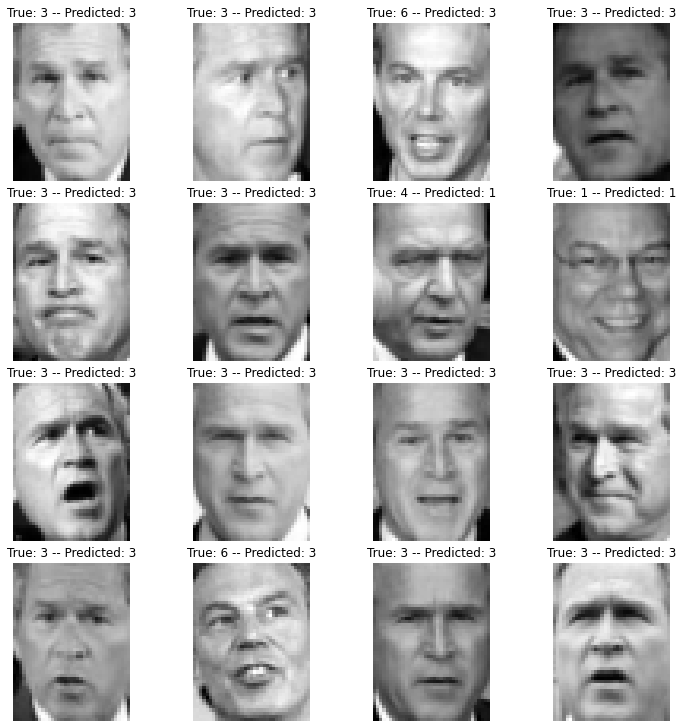

In [49]:
# solution

X_test = X_test.reshape(322, 50, 37)

titles = ['True: {} -- Predicted: {}'.format(i, j) for i, j in zip(y_test, pred)]

custom_grids(X_test[:16], 4, 4, titles=titles[:16], cmap='gray', axis='off').show()

*   What are the disadvantages of using kNN

**Solution**

*Based off the results we obtained in this lab, even when using PCA to reduce dimensionality, image data is too complex to be analyzed using k nearest neighbors, as shown by the low accuracy values.*

*After some additional research from external resources, we found that there are some other disadvantages of KNN. One is that, since it is continually comparing each new test image to the entire set of train images, it requires a lot of memory and is computationally complex.*
...


---

# **End of L3_1: Face Detection and Recognition**
Deadline for L3_1 submission in CampusVirtual is: **Thursday, the 10th of November, 2022**